In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#THIS ABOVE LINE TELLS TO USE MATPLOTLIB AS A BACKEND

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
x= housing.data
y=housing.target

data=pd.DataFrame(x, columns= housing.feature_names)
data["SalePrice"]=y
#FOR SHOWING THE DATAFRAME
data.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,SalePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
# FULL DESCRIPTION OF THE DATASETS  and for statistical decription use data.describe()
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
#SIMILAR TO THE ORDER OF A MATRIX
print(data.shape)


(20640, 9)


In [5]:
#INFORMATION OF THE DATA WHETHER NULL OR NOT NULL, DATA TYPE ,ETC.
print(data.info)


<bound method DataFrame.info of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       

In [6]:
print("skewness: %f" % data['SalePrice'].skew())
print("Kurtosis: %f" % data['SalePrice'].kurt())

skewness: 0.977763
Kurtosis: 0.327870


C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


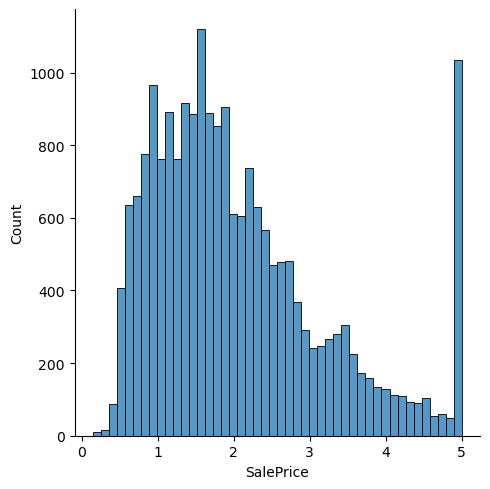

In [7]:
sns.displot(data['SalePrice']);


# DATA CORRELATION

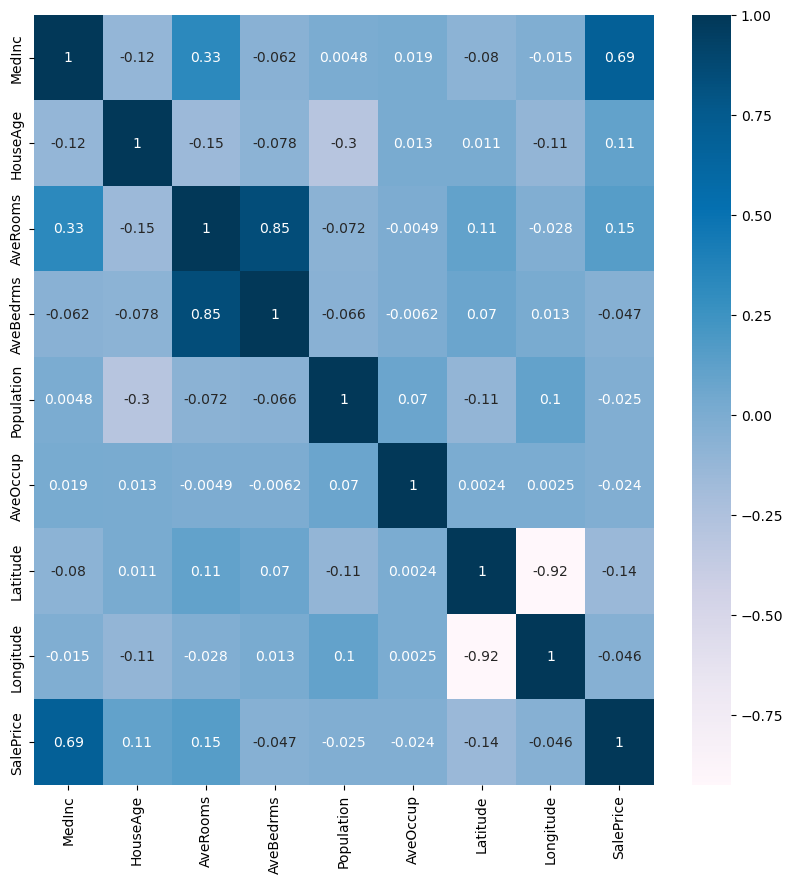

In [8]:
plt.figure(figsize=(10,10))
cor=data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
plt.show()

# REFINEMENT


C:\Users\lenovo\AppData\Local\Temp\ipykernel_14808\2409962724.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SalePrice'] , fit=norm);



 mu = 1.06 and sigma = 0.36



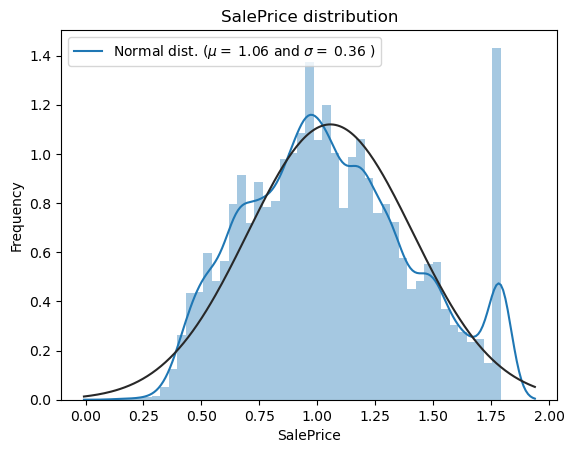

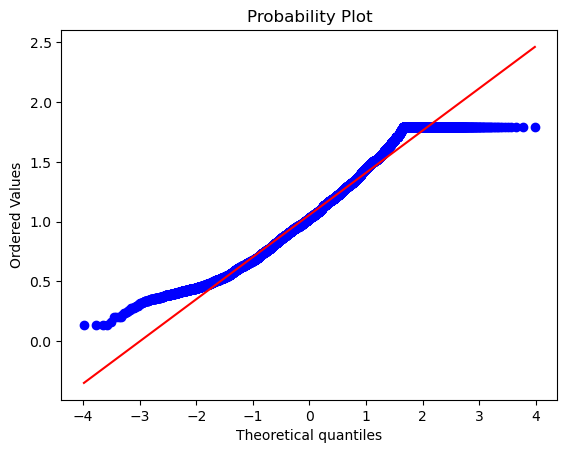

In [9]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics
data["SalePrice"] = np.log1p(data["SalePrice"])

sns.distplot(data['SalePrice'] , fit=norm);

(mu, sigma) = norm.fit(data['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)
plt.show()

# MODEL BUILDING

In [10]:
from sklearn.model_selection import train_test_split
x = data.drop("SalePrice", axis=1)
y= data["SalePrice"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [11]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(13828, 8)
(6812, 8)
(13828,)
(6812,)


In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [13]:
pred = lr.predict(x_test)
print("Actual value of the house", y_test[0])
print("Model predicted value of the house", pred[0])

Actual value of the house 1.7094642265012248
Model predicted value of the house 0.6296739737951711


# Checking the accuracy

In [14]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,pred)
rmse =np.sqrt(mse)
print(mse)
print(rmse)

0.048917681058073564
0.22117341851604494
